<a href="https://colab.research.google.com/github/GeorgeAlcazar/timeline_s2/blob/main/iris-clasificacion-g4GA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://miro.medium.com/v2/resize:fit:1400/1*zomnCz8-VMgrSV8eLCx2tw.gif" width="200" alt="molecula"  />

$$\Large \textit{Cuaderno de Código #1 | Sesión Nº 3}$$

---
$$\large\textbf{Desarrollo de Modelo de Clasificación}$$

---
$$\textit{+ Actividad 2}$$

<br>
<br>

__Dr. Jesus Alvarado-Huayhuaz__

---



# Desarrollo de modelos de IA

## Requerimientos

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Base de datos

In [7]:
# Cargar el archivo

url = "https://raw.githubusercontent.com/johnerick66/modelo-volatilidad/main/tipo%20de%20cambio.csv"
# Cargar CSV correctamente interpretando el separador de miles
df = pd.read_csv(
    url,
    sep=",",
    quotechar='"',
    thousands=","
)


In [8]:
help(df)

Help on DataFrame in module pandas.core.frame object:

class DataFrame(pandas.core.generic.NDFrame, pandas.core.arraylike.OpsMixin)
 |  DataFrame(data=None, index: 'Axes | None' = None, columns: 'Axes | None' = None, dtype: 'Dtype | None' = None, copy: 'bool | None' = None)
 |  
 |  Two-dimensional, size-mutable, potentially heterogeneous tabular data.
 |  
 |  Data structure also contains labeled axes (rows and columns).
 |  Arithmetic operations align on both row and column labels. Can be
 |  thought of as a dict-like container for Series objects. The primary
 |  pandas data structure.
 |  
 |  Parameters
 |  ----------
 |  data : ndarray (structured or homogeneous), Iterable, dict, or DataFrame
 |      Dict can contain Series, arrays, constants, dataclass or list-like objects. If
 |      data is a dict, column order follows insertion-order.
 |  
 |      .. versionchanged:: 0.25.0
 |         If data is a list of dicts, column order follows insertion-order.
 |  
 |  index : Index or a

## Exploración de datos

### ¿Qué información contiene el dataset?

In [9]:
# Veamos el contenido general del dataset

df.keys()

Index(['Tipo de cambio - TC Sistema bancario SBS (S/ por US$) - Venta', 'dia',
       'mes', 'año', 'fecha', 'dia de semana', 'Inflación PERU',
       'Precio Cobre', 'Precio Oro', 'Precio Zinc', 'PIB',
       'Reservas internacionales', 'Intervenciones del BCRP',
       'Inflación EEUU'],
      dtype='object')

### ¿Cómo veo la data de forma tabular?

In [10]:

# Renombrar columnas a nombres cortos
df = df.rename(columns={
    "Tipo de cambio - TC Sistema bancario SBS (S/ por US$) - Venta": "TC",
    "dia": "dia",
    "mes": "mes",
    "año": "anio",
    "fecha": "fecha",
    "dia de semana": "dia_semana",
    "Inflación PERU": "inflacion_peru",
    "Precio Cobre": "precio_cobre",
    "Precio Oro": "precio_oro",
    "Precio Zinc": "precio_zinc",
    "PIB": "pbi",
    "Reservas internacionales": "reservas",
    "Intervenciones del BCRP": "interv_bcrp",
    "Inflación EEUU": "inflacion_usa"
})

In [11]:
#Correccion de columnas

# Limpiar porcentaje
df["inflacion_usa"] = (
    df["inflacion_usa"]
    .astype(str)
    .str.replace("%", "", regex=False)
    .astype(float) / 100
)


In [12]:
df

,TC,dia,mes,anio,fecha,dia_semana,inflacion_peru,precio_cobre,precio_oro,precio_zinc,pbi,reservas,interv_bcrp,inflacion_usa
0,2.989,1,Ene,2015,01/01/2015,4,3.07,265.58,"1,249.45",95.96,442.23,62086.34977,1,0.0025
1,2.989,2,Ene,2015,02/01/2015,5,3.07,265.58,"1,249.45",95.96,442.23,62086.34977,1,0.0025
2,2.992,5,Ene,2015,05/01/2015,1,3.07,265.58,"1,249.45",95.96,442.23,62086.34977,1,0.0025
3,2.983,6,Ene,2015,06/01/2015,2,3.07,265.58,"1,249.45",95.96,442.23,62416.87961,1,0.0025
4,2.987,7,Ene,2015,07/01/2015,3,3.07,265.58,"1,249.45",95.96,442.23,62367.97035,1,0.0025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2846,3.384,26,Nov,2025,26/11/2025,3,NaN,NaN,NaN,NaN,612.58,90077.45439,1,0.0400
2847,3.384,27,Nov,2025,27/11/2025,4,NaN,NaN,NaN,NaN,612.58,90077.45439,1,0.0400
2848,3.384,28,Nov,2025,28/11/2025,5,NaN,NaN,NaN,NaN,612.58,90077.45439,1,0.0400
2849,3.384,29,Nov,2025,29/11/2025,6,NaN,NaN,NaN,NaN,612.58,90077.45439,1,0.0400


### ¿Qué tipos de datos son?

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2851 entries, 0 to 2850
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   TC              2851 non-null   float64
 1   dia             2851 non-null   int64  
 2   mes             2851 non-null   object 
 3   anio            2851 non-null   int64  
 4   fecha           2851 non-null   object 
 5   dia_semana      2851 non-null   int64  
 6   inflacion_peru  2840 non-null   float64
 7   precio_cobre    2840 non-null   object 
 8   precio_oro      2840 non-null   object 
 9   precio_zinc     2840 non-null   object 
 10  pbi             2851 non-null   float64
 11  reservas        2851 non-null   float64
 12  interv_bcrp     2851 non-null   int64  
 13  inflacion_usa   2851 non-null   float64
dtypes: float64(5), int64(4), object(5)
memory usage: 312.0+ KB


### ¿Qué medidas de tendencia encontramos?

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TC,2851.0,3.524070,0.257080,2.98300,3.30050,3.46900,3.742000,4.13600
dia,2851.0,15.743949,8.801656,1.00000,8.00000,16.00000,23.000000,31.00000
anio,2851.0,2019.967380,3.147038,2015.00000,2017.00000,2020.00000,2023.000000,2025.00000
dia_semana,2851.0,3.005963,1.419772,1.00000,2.00000,3.00000,4.000000,7.00000
inflacion_peru,2840.0,3.403560,2.155999,0.36000,1.87000,2.77000,4.040000,8.81000
pbi,2851.0,538.358586,50.174770,328.88000,504.74000,543.21000,570.090000,656.62000
reservas,2851.0,70460.299438,8341.359023,57940.51079,62166.43263,71852.70556,75978.458805,90275.52931
interv_bcrp,2851.0,0.273939,0.446056,0.00000,0.00000,0.00000,1.000000,1.00000
inflacion_usa,2851.0,0.021230,0.018876,0.00250,0.00250,0.01750,0.045000,0.05500


### ¿Cómo están distribuidos los datos?

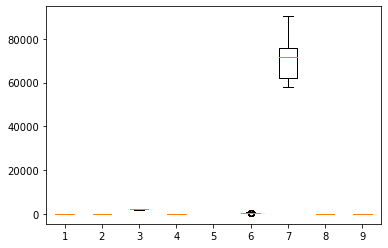

In [15]:
num_cols = df.select_dtypes(include=['float64', 'int64'])
plt.boxplot(num_cols)
plt.show()



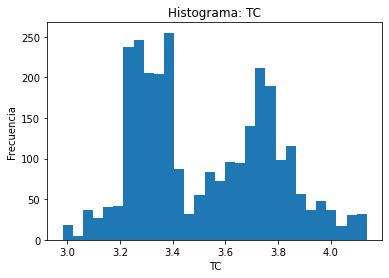

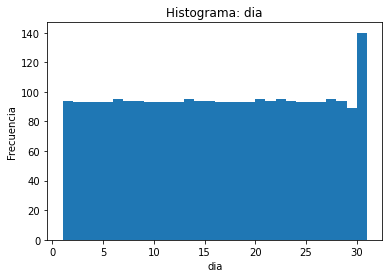

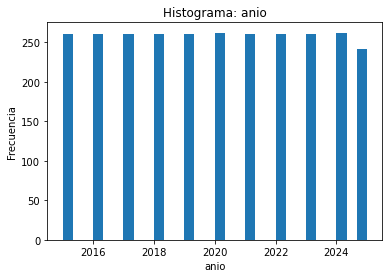

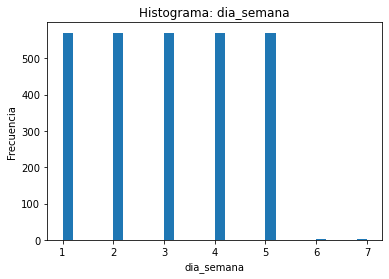

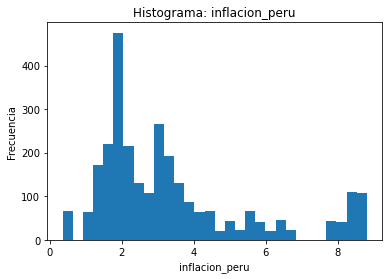

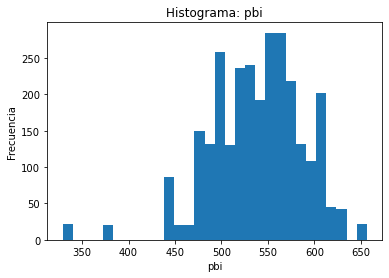

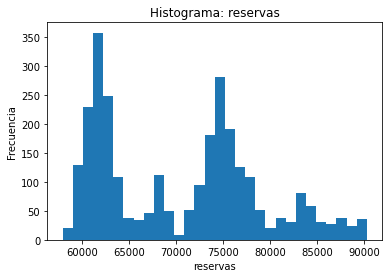

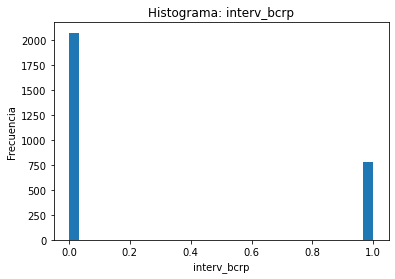

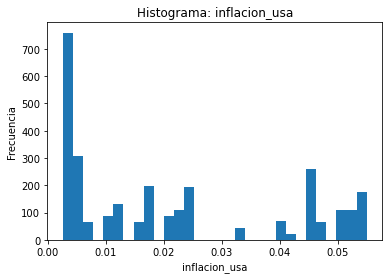

In [16]:
# Diagrama de barras: Frecuencia de los datos


# Mantener solo columnas numéricas
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

for col in numeric_cols:
    plt.figure(figsize=(6,4))
    plt.hist(df[col].dropna(), bins=30)
    plt.title(f"Histograma: {col}")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")
    plt.show()


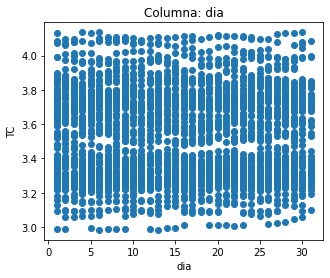

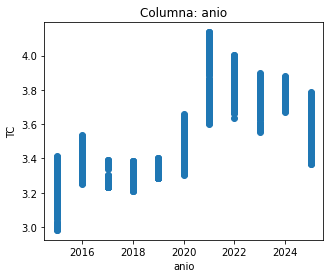

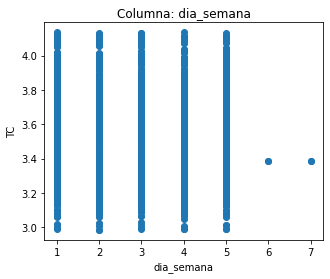

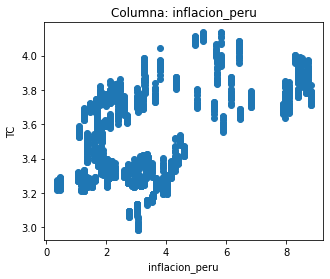

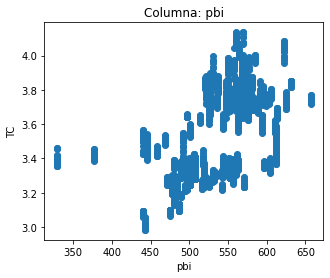

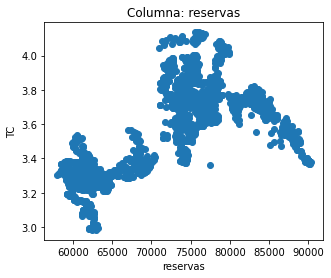

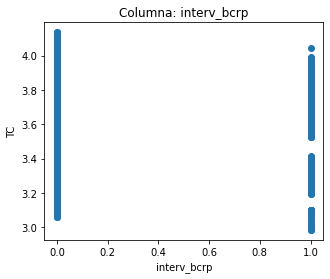

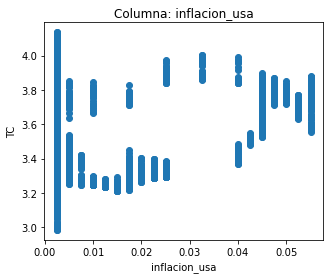

In [17]:
# Diagrama de dispersión respecto al target

# Solo columnas numéricas
numeric_cols = df.select_dtypes(include=['number']).columns

for col in numeric_cols:
    if col != 'TC':  # evitar graficar TC vs TC
        plt.figure(figsize=(5,4))
        plt.scatter(df[col], df['TC'])
        plt.xlabel(col)
        plt.ylabel("TC")
        plt.title(f"Columna: {col}")
        plt.show()

In [18]:
df

,TC,dia,mes,anio,fecha,dia_semana,inflacion_peru,precio_cobre,precio_oro,precio_zinc,pbi,reservas,interv_bcrp,inflacion_usa
0,2.989,1,Ene,2015,01/01/2015,4,3.07,265.58,"1,249.45",95.96,442.23,62086.34977,1,0.0025
1,2.989,2,Ene,2015,02/01/2015,5,3.07,265.58,"1,249.45",95.96,442.23,62086.34977,1,0.0025
2,2.992,5,Ene,2015,05/01/2015,1,3.07,265.58,"1,249.45",95.96,442.23,62086.34977,1,0.0025
3,2.983,6,Ene,2015,06/01/2015,2,3.07,265.58,"1,249.45",95.96,442.23,62416.87961,1,0.0025
4,2.987,7,Ene,2015,07/01/2015,3,3.07,265.58,"1,249.45",95.96,442.23,62367.97035,1,0.0025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2846,3.384,26,Nov,2025,26/11/2025,3,NaN,NaN,NaN,NaN,612.58,90077.45439,1,0.0400
2847,3.384,27,Nov,2025,27/11/2025,4,NaN,NaN,NaN,NaN,612.58,90077.45439,1,0.0400
2848,3.384,28,Nov,2025,28/11/2025,5,NaN,NaN,NaN,NaN,612.58,90077.45439,1,0.0400
2849,3.384,29,Nov,2025,29/11/2025,6,NaN,NaN,NaN,NaN,612.58,90077.45439,1,0.0400


### Resumiendo

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

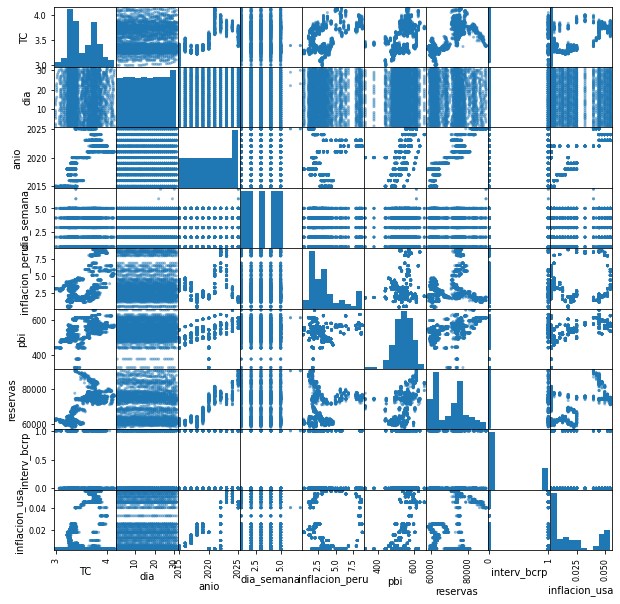

In [19]:
# Mostrar todas las columnas
pd.set_option('display.max_columns', None)

# Seleccionar solo las columnas numéricas automáticamente
columns = df.select_dtypes(include=['number']).columns

# Matriz de dispersión
fig = pd.plotting.scatter_matrix(df[columns], figsize=(10, 10), diagonal='hist')

plt.tight_layout

c:\Users\john_\anaconda3\lib\site-packages\numpy\linalg\linalg.py:2158: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


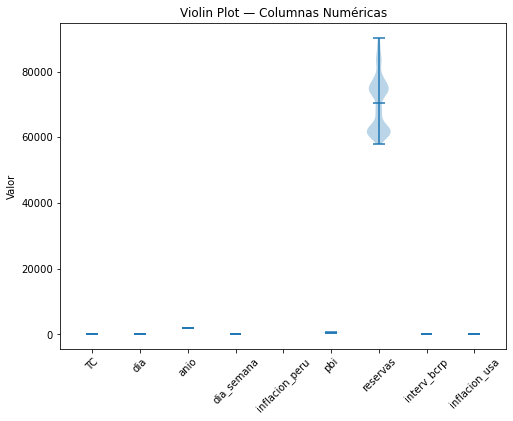

In [20]:
# violinplot
num_df = df.select_dtypes(include='number')
plt.figure(figsize=(8,6))
plt.violinplot(num_df.values, showmeans=True)
plt.xticks(range(1, len(num_df.columns)+1), num_df.columns, rotation=45)
plt.ylabel("Valor")
plt.title("Violin Plot — Columnas Numéricas")
plt.show()


### ¿Cómo se relacionan estos?

In [21]:
df.corr()

,TC,dia,anio,dia_semana,inflacion_peru,pbi,reservas,interv_bcrp,inflacion_usa
TC,1.000000,-0.001812,0.748187,-0.006519,0.516987,0.527608,0.703073,-0.012682,0.382156
dia,-0.001812,1.000000,0.003030,0.002930,0.001816,0.013953,0.005045,0.003126,0.005160
anio,0.748187,0.003030,1.000000,0.005305,0.156310,0.642676,0.905587,0.015616,0.743440
dia_semana,-0.006519,0.002930,0.005305,1.000000,0.000729,0.006493,0.010308,0.014041,0.004440
inflacion_peru,0.516987,0.001816,0.156310,0.000729,1.000000,0.129311,0.131409,-0.017686,0.095462
pbi,0.527608,0.013953,0.642676,0.006493,0.129311,1.000000,0.573431,0.094564,0.612183
reservas,0.703073,0.005045,0.905587,0.010308,0.131409,0.573431,1.000000,0.025967,0.495970
interv_bcrp,-0.012682,0.003126,0.015616,0.014041,-0.017686,0.094564,0.025967,1.000000,0.045597
inflacion_usa,0.382156,0.005160,0.743440,0.004440,0.095462,0.612183,0.495970,0.045597,1.000000


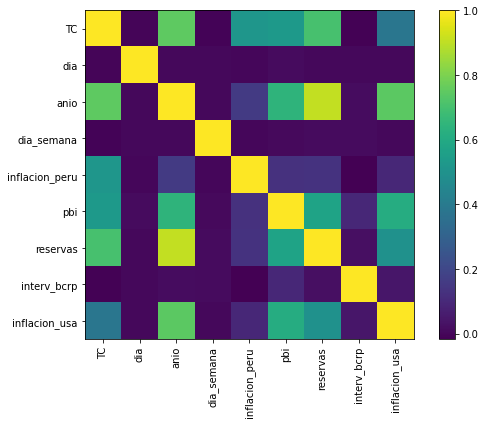

In [22]:
corr = df.corr()

plt.figure(figsize=(8,6))
plt.imshow(corr) #, interpolation='nearest')
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.colorbar()
plt.tight_layout()
plt.show()

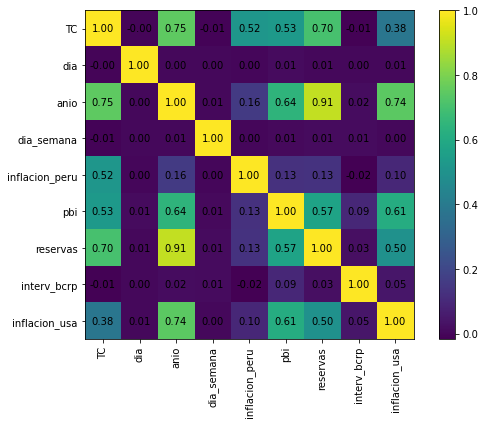

In [23]:
corr = df.corr()

plt.figure(figsize=(8,6))
plt.imshow(corr, interpolation='nearest')
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.colorbar()

# Agregar los valores numéricos dentro de cada celda
for i in range(len(corr.columns)):
    for j in range(len(corr.columns)):
        plt.text(j, i, f"{corr.iloc[i, j]:.2f}",
                 ha='center', va='center')

plt.tight_layout()
plt.show()

## Entrenamiento

### División de los datos

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X = df[['anio', 'dia', 'dia_semana']]
y = df['TC']



In [26]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=123)

In [27]:
X_train.head(3)

,anio,dia,dia_semana
1698,2021,6,2
379,2016,15,3
1727,2021,16,1


In [28]:
X_test.head(3)

,anio,dia,dia_semana
1895,2022,7,4
2705,2025,15,4
2274,2023,20,3


In [29]:
y_train.head(3)

1698    3.951
379     3.322
1727    4.079
Name: TC, dtype: float64

In [30]:
y_test.head(3)

1895    3.714
2705    3.686
2274    3.718
Name: TC, dtype: float64

### Los "K" vecinos más cercanos

In [31]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

In [32]:
knn = KNeighborsRegressor(n_neighbors=5)

# Entrenar
knn.fit(X_train, y_train)

KNeighborsRegressor()

### Predicciones

In [33]:
y_pred = knn.predict(X_test)

In [34]:
knn_predicciones = pd.DataFrame({
    "y_test": y_test,
    "y_pred": y_pred
})

knn_predicciones

,y_test,y_pred
1895,3.714,3.9350
2705,3.686,3.6078
2274,3.718,3.6958
257,3.402,3.2548
2299,3.871,3.7458
...,...,...
164,3.254,3.1570
1822,3.991,3.7700
996,3.347,3.2596
239,3.373,3.1798


## Métricas

In [35]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay, roc_curve, auc

In [37]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R²:", r2)

MAE: 0.08967124343257443
MSE: 0.01380446085323993
RMSE: 0.11749238636286152
R²: 0.7934814853953148


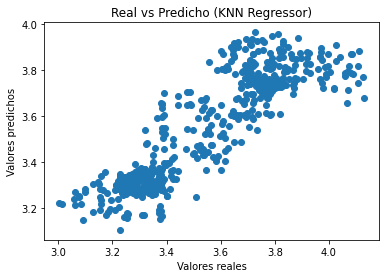

In [38]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Valores reales")
plt.ylabel("Valores predichos")
plt.title("Real vs Predicho (KNN Regressor)")
plt.show()


## Guardar el modelo

In [39]:
import joblib

In [40]:
import joblib

# Guardar el modelo en un archivo
joblib.dump(knn, 'modelo_TC_knn.pkl')

['modelo_TC_knn.pkl']

In [ ]:
# Este archivo se guarda en la carpeta temporal de Colab. Puedes descargarlo así:
from google.colab import files
files.download('modelo_TC_knn.pkl')

In [43]:
import joblib
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

# Dataset
X = df[['anio', 'dia', 'dia_semana']]
y = df['TC']   # Variable continua → REGRESIÓN

# División train / test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# ---------------------------------------------------
# 1. MODELO ÁRBOL DE DECISIÓN (REGRESIÓN)
# ---------------------------------------------------
dt_model = DecisionTreeRegressor(max_depth=3, random_state=42)
dt_model.fit(X_train, y_train)

# Guardar modelo
joblib.dump(dt_model, 'modelo_TC_dt.pkl')

# ---------------------------------------------------
# 2. MODELO SVM (REGRESIÓN)
# ---------------------------------------------------
svm_model = SVR(kernel='linear', C=1.0)
svm_model.fit(X_train, y_train)

# Guardar modelo
joblib.dump(svm_model, 'modelo_TC_svr.pkl')

# ---------------------------------------------------
# 3. CARGAR Y PROBAR MODELOS
# ---------------------------------------------------

# Cargar Árbol
dt_loaded = joblib.load('modelo_TC_dt.pkl')
print("Predicción Árbol de Decisión:", dt_loaded.predict([X_test.iloc[0]]))

# Cargar SVM
svm_loaded = joblib.load('modelo_TC_svr.pkl')
print("Predicción SVM:", svm_loaded.predict([X_test.iloc[0]]))


Predicción Árbol de Decisión: [3.86036612]
Predicción SVM: [3.5731294]


c:\Users\john_\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
c:\Users\john_\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


# Actividad:

1. Martes: Desarrolla 2 modelos de clasificación más usando "Arbol de decisión" y "SVM"
2. Jueves: Despliega los 3 modelos (incluyendo knn) en Streamlit.
3. Envía al correo (solo uno por grupo) y anota en el excel compartido tu url.